In [11]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
x=loadmat('Dataset_41_13031.mat')
print(x['Input'].shape)
print(x['Target'].shape)
print(x)
x_train=x['Input']
y_train=x['Target']

(41, 41, 1, 13031)
(1, 13031)
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Aug 27 18:02:59 2018', '__version__': '1.0', '__globals__': [], 'Input': array([[[[112, 113,  94, ...,   5,   5,   2]],

        [[114,  94, 106, ...,   1,   0,   1]],

        [[ 95, 106, 106, ...,   0,   7,   1]],

        ...,

        [[ 94,  73,  97, ...,   3,   5,   0]],

        [[ 98,  97,  93, ...,   1,   0,   5]],

        [[ 76,  93,  76, ...,   3,   5,   0]]],


       [[[113, 104, 120, ...,   2,   3,   1]],

        [[ 94, 120, 109, ...,   1,   7,   0]],

        [[106, 109, 118, ...,   0,   5,   5]],

        ...,

        [[ 73,  84,  71, ...,   1,   5,   2]],

        [[ 97,  71,  72, ...,   2,   1,   0]],

        [[ 93,  72,  62, ...,   2,   4,   2]]],


       [[[104, 100, 129, ...,   0,   5,   3]],

        [[120, 129, 116, ...,   5,   8,   0]],

        [[109, 116, 122, ...,   9,   1,   4]],

        ...,

        [[ 84,  76,  66, ...,   3,   0,   5]],

        [[

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Data for the training set
(11000, 41, 41, 1)
labels for the training set
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Data for the test test
[[[[ 71.]
   [ 72.]
   [ 62.]
   ...
   [ 47.]
   [ 56.]
   [ 66.]]

  [[ 71.]
   [ 61.]
   [ 60.]
   ...
   [ 57.]
   [ 47.]
   [ 66.]]

  [[ 61.]
   [ 63.]
   [ 68.]
   ...
   [ 81.]
   [ 52.]
   [ 62.]]

  ...

  [[111.]
   [118.]
   [131.]
   ...
   [ 96.]
   [ 95.]
   [100.]]

  [[110.]
   [116.]
   [109.]
   ...
   [117.]
   [117.]
   [109.]]

  [[110.]
   [112.]
   [ 88.]
   ...
   [128.]
   [119.]
   [116.]]]


 [[[ 72.]
   [ 62.]
   [ 64.]
   ...
   [ 56.]
   [ 66.]
   [ 30.]]

  [[ 61.]
   [ 60.]
   [ 75.]
   ...
   [ 47.]
   [ 66.]
   [ 41.]]

  [[ 63.]
   [ 68.]
   [ 63.]
   ...
   [ 52.]
   [ 62.]
   [ 41.]]

  ...

  [[118.]
   [131.]
   [114.]
   ...
   [ 95.]
   [100.]
   [105.]]

  [[116.]
   [109.]
   [125.]
   ...
   [117.]
   [109.]
   [106.]]

  [[112.]
   [ 88.]
   [111.]
   ...
   [119.]
   [116.]
   [125.]]]


 [[[ 62.]
   [ 64.]
  

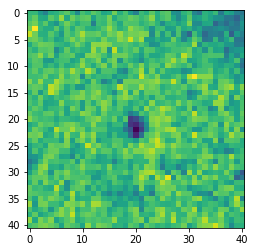

In [12]:
n_train=11000
#reshape data to fit model
rx_train=np.zeros(shape=(n_train,41,41,1))
rx_test=np.zeros(shape=(13031-n_train,41,41,1))
fx_train=np.zeros(shape=(13031,41,41,1))

for i in range (13031):
    fx_train[i]=x_train[:,:,:,i].reshape(41,41,1)
    if i<n_train:
        rx_train[i]=x_train[:,:,:,i].reshape(41,41,1)
        
    else:
        rx_test[i-13031]=x_train[:,:,:,i].reshape(41,41,1)
        
    
#reshape labels to fit the model
ry_train=np.zeros(shape=(n_train,1))
ry_test= np.zeros(shape=(13031-n_train,1))
ry_train=y_train[0,:n_train].reshape(n_train,1)
ry_test=y_train[0,n_train:].reshape(13031-n_train,1)

print('Data for the training set')
print(rx_train.shape)
print('labels for the training set')
print(ry_train)

print('Data for the test test')
print(rx_test)
print('labels for the test set')
print(ry_test)

# Create an image generator class
imgGentrain = ImageDataGenerator()

imgGentest = ImageDataGenerator()

train_batch = imgGentrain.flow(
    x=rx_train,
    y=ry_train,
    batch_size=32,
    shuffle=True,
    seed=1)
test_batch = imgGentest.flow(
    x=rx_test,
    y=ry_test,
    batch_size=32,
    shuffle=True,
    seed=2)


index = 3    # just some image for preview
plt.imshow(rx_train[index, :, :, 0])
print("y = " + str(np.squeeze(ry_train[index, :])))

In [4]:
print(rx_train.shape)
print(rx_test.shape)
print(ry_train.shape)
print(ry_test.shape)
from keras.utils import to_categorical
#one-hot encode target column
cy_train=to_categorical(ry_train)
cy_test=to_categorical(ry_test)
print(cy_train[0])
print(cy_test[-1])

(11000, 41, 41, 1)
(2031, 41, 41, 1)
(11000, 1)
(2031, 1)
[0. 1.]
[1. 0.]


In [5]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(124, kernel_size=(5, 5),strides=(1,1),
                 activation='relu',
                 input_shape=(41,41,1)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Conv2D(64,(5,5),activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 37, 37, 124)       3224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 124)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        198464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)  

In [6]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
#train the model 
model.fit(rx_train, cy_train, validation_data=(rx_test,cy_test),epochs=5)

Instructions for updating:
Use tf.cast instead.
Train on 11000 samples, validate on 2031 samples
Epoch 1/5
   64/11000 [..............................] - ETA: 22:51 - loss: 3.7531 - acc: 0.4062

/home/poc/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.668236). Check your callbacks.
  % delta_t_median)


11000/11000 [==============================] - 156s 14ms/step - loss: 0.4169 - acc: 0.8140 - val_loss: 0.1973 - val_acc: 0.9468
Epoch 2/5
11000/11000 [==============================] - 152s 14ms/step - loss: 0.1067 - acc: 0.9634 - val_loss: 0.0885 - val_acc: 0.9705
Epoch 3/5
11000/11000 [==============================] - 146s 13ms/step - loss: 0.0765 - acc: 0.9745 - val_loss: 0.0635 - val_acc: 0.9724
Epoch 4/5
11000/11000 [==============================] - 135s 12ms/step - loss: 0.0570 - acc: 0.9810 - val_loss: 0.0324 - val_acc: 0.9862
Epoch 5/5
11000/11000 [==============================] - 141s 13ms/step - loss: 0.0517 - acc: 0.9825 - val_loss: 0.0193 - val_acc: 0.9951
